In [1]:
import pandas as pd

In [2]:
usedcar= pd.read_csv('Dataset.csv')

In [3]:
usedcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1725 non-null   int64  
 1   year                     1725 non-null   int64  
 2   brand                    1725 non-null   object 
 3   full_model_name          1725 non-null   object 
 4   model_name               1725 non-null   object 
 5   price                    1725 non-null   float64
 6   distance_travelled(kms)  1725 non-null   float64
 7   fuel_type                1725 non-null   object 
 8   city                     1725 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 121.4+ KB


In [4]:
usedcar.head(10)

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai
5,5,2012,Hyundai,Hyundai i20 Sportz 1.2 BS-IV,i20,335000.0,45000.0,Petrol,Mumbai
6,6,2019,Toyota,Toyota Glanza V,Glanza,750000.0,19500.0,Petrol,Mumbai
7,7,2018,Mercedes-Benz,Mercedes-Benz GLE 250 d,GLE,5500000.0,32000.0,Diesel,Mumbai
8,8,2017,Hyundai,Hyundai Grand i10 Sportz (O) AT 1.2 Kappa VTVT...,Grand,565000.0,44329.0,Petrol,Mumbai
9,9,2015,Maruti Suzuki,Maruti Suzuki Swift Dzire ZXI,Swift,510000.0,48286.0,Petrol,Mumbai


In [5]:
usedcar.describe()

,Id,year,price,distance_travelled(kms)
count,1725.000000,1725.000000,1.725000e+03,1725.000000
mean,862.000000,2015.390725,1.494837e+06,53848.256232
std,498.108924,3.207504,1.671658e+06,44725.541963
min,0.000000,1990.000000,6.250000e+04,350.000000
25%,431.000000,2013.000000,5.450000e+05,29000.000000
50%,862.000000,2016.000000,8.750000e+05,49000.000000
75%,1293.000000,2018.000000,1.825000e+06,70500.000000
max,1724.000000,2021.000000,1.470000e+07,790000.000000


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'distance_travelled(kms)'}>]],
      dtype=object)

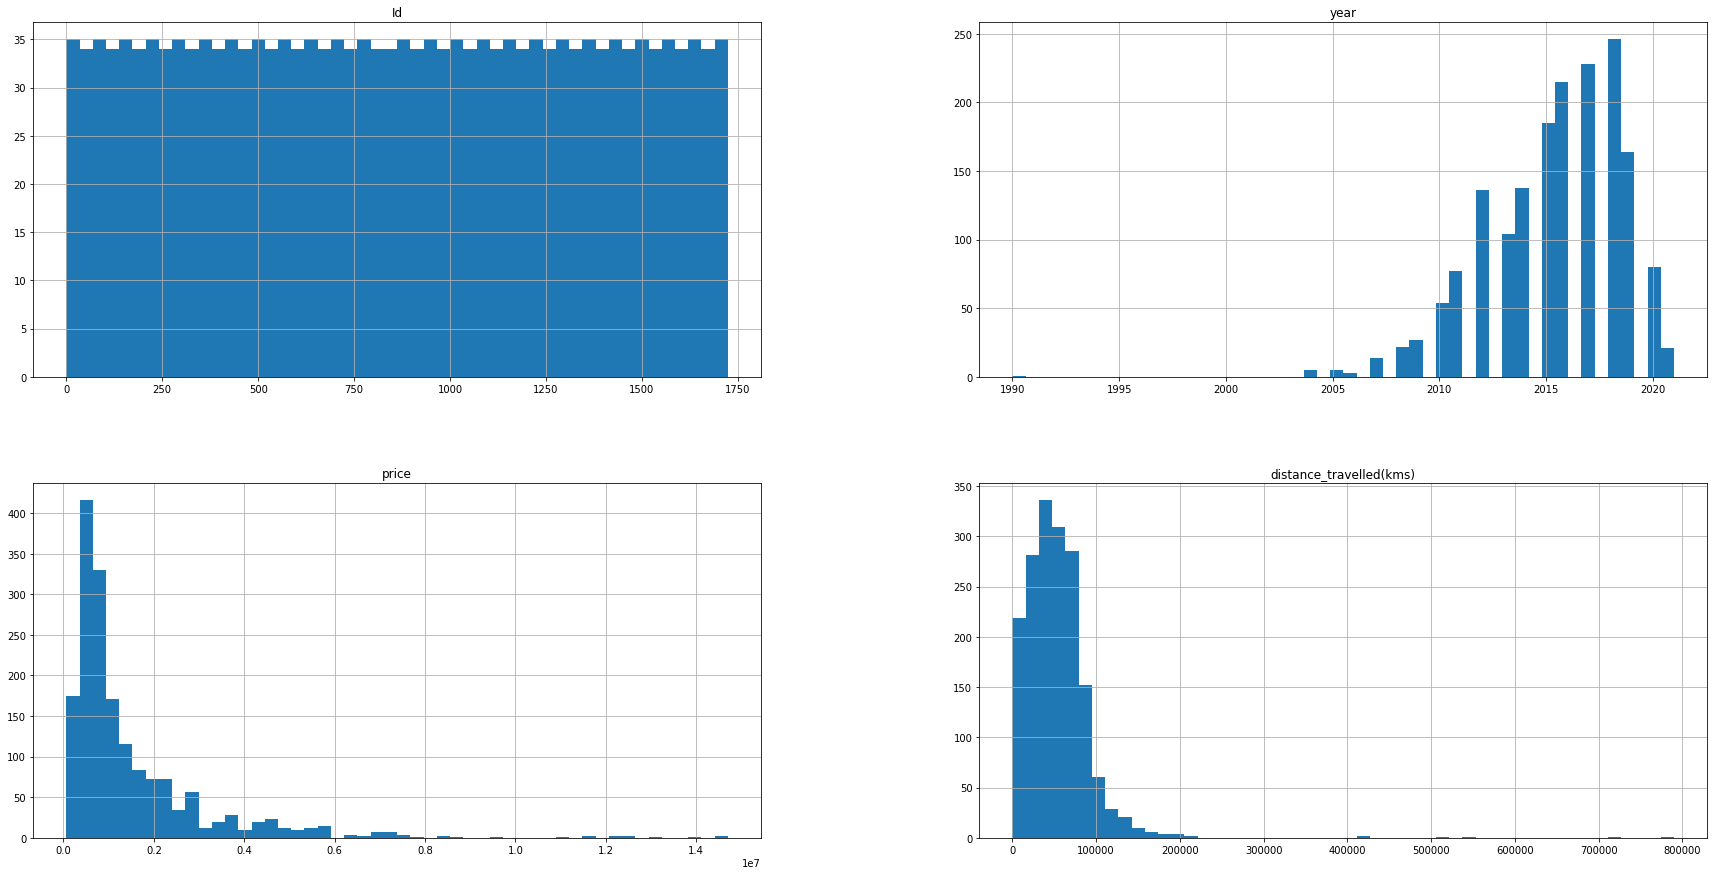

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
usedcar.hist(bins=50, figsize=(30,15))

# Train Test split

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(usedcar, test_size=0.2, random_state=42)

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1380 entries, 107 to 1126
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1380 non-null   int64  
 1   year                     1380 non-null   int64  
 2   brand                    1380 non-null   object 
 3   full_model_name          1380 non-null   object 
 4   model_name               1380 non-null   object 
 5   price                    1380 non-null   float64
 6   distance_travelled(kms)  1380 non-null   float64
 7   fuel_type                1380 non-null   object 
 8   city                     1380 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 107.8+ KB


In [9]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 339 to 1630
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       345 non-null    int64  
 1   year                     345 non-null    int64  
 2   brand                    345 non-null    object 
 3   full_model_name          345 non-null    object 
 4   model_name               345 non-null    object 
 5   price                    345 non-null    float64
 6   distance_travelled(kms)  345 non-null    float64
 7   fuel_type                345 non-null    object 
 8   city                     345 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 27.0+ KB


In [10]:
train_setcopy= train_set.copy()

# Finding correlations

In [11]:
corr_matrix= train_setcopy.corr()

In [12]:
corr_matrix['price'].sort_values(ascending=False)

price                      1.000000
year                       0.265539
Id                        -0.105741
distance_travelled(kms)   -0.118618
Name: price, dtype: float64

# Attribute combinations

In [13]:
train_setcopy.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city
107,107,2014,Toyota,Toyota Innova 2.5 EV PS 7 STR BS-IV,Innova,950000.0,91000.0,Diesel,Mumbai
522,522,2018,Hyundai,Hyundai Creta SX 1.6 (O) Petrol,Creta,1345000.0,36986.0,Petrol,Bangalore
1706,1706,2019,Maruti Suzuki,Maruti Suzuki Swift ZXi,Swift,710000.0,12500.0,Petrol,Pune
704,704,2019,Ford,Ford Freestyle Titanium Plus 1.2 Ti-VCT [2018-...,Freestyle,740000.0,2750.0,Petrol,Bangalore
677,677,2018,Hyundai,Hyundai Creta SX 1.6 Petrol,Creta,1285000.0,10100.0,Petrol,Bangalore


In [14]:
#1st attribute 'car_age'
current_year= 2022
age=[]
for i in train_setcopy['year']:
    age.append(current_year- float(i))

In [15]:
len(age)

1380

In [16]:
train_setcopy['Car_age'] = age

In [17]:
train_setcopy.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,Car_age
107,107,2014,Toyota,Toyota Innova 2.5 EV PS 7 STR BS-IV,Innova,950000.0,91000.0,Diesel,Mumbai,8.0
522,522,2018,Hyundai,Hyundai Creta SX 1.6 (O) Petrol,Creta,1345000.0,36986.0,Petrol,Bangalore,4.0
1706,1706,2019,Maruti Suzuki,Maruti Suzuki Swift ZXi,Swift,710000.0,12500.0,Petrol,Pune,3.0
704,704,2019,Ford,Ford Freestyle Titanium Plus 1.2 Ti-VCT [2018-...,Freestyle,740000.0,2750.0,Petrol,Bangalore,3.0
677,677,2018,Hyundai,Hyundai Creta SX 1.6 Petrol,Creta,1285000.0,10100.0,Petrol,Bangalore,4.0


In [18]:
#2nd Attribue- dist_below_30k
best_km= 30000
temp_km=[]
for i in train_setcopy['distance_travelled(kms)']:
    if i<= best_km:
        temp_km.append(int(1))
    else:
        temp_km.append(int(0))

In [19]:
len(temp_km)

1380

In [20]:
train_setcopy['dist_below_30k']= temp_km

In [21]:
train_setcopy.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,Car_age,dist_below_30k
107,107,2014,Toyota,Toyota Innova 2.5 EV PS 7 STR BS-IV,Innova,950000.0,91000.0,Diesel,Mumbai,8.0,0
522,522,2018,Hyundai,Hyundai Creta SX 1.6 (O) Petrol,Creta,1345000.0,36986.0,Petrol,Bangalore,4.0,0
1706,1706,2019,Maruti Suzuki,Maruti Suzuki Swift ZXi,Swift,710000.0,12500.0,Petrol,Pune,3.0,1
704,704,2019,Ford,Ford Freestyle Titanium Plus 1.2 Ti-VCT [2018-...,Freestyle,740000.0,2750.0,Petrol,Bangalore,3.0,1
677,677,2018,Hyundai,Hyundai Creta SX 1.6 Petrol,Creta,1285000.0,10100.0,Petrol,Bangalore,4.0,1


In [22]:
#3rd Attribute = lessUsed_car
temp=[]
for i in train_setcopy['Id']:
    if train_setcopy['Car_age'][i]<=4 and train_setcopy['dist_below_30k'][i]==1:
        temp.append(int(1))
    else:
        temp.append(int(0))

In [23]:
len(temp)

1380

In [24]:
train_setcopy['lessUsed_car']= temp

In [25]:
train_setcopy.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,Car_age,dist_below_30k,lessUsed_car
107,107,2014,Toyota,Toyota Innova 2.5 EV PS 7 STR BS-IV,Innova,950000.0,91000.0,Diesel,Mumbai,8.0,0,0
522,522,2018,Hyundai,Hyundai Creta SX 1.6 (O) Petrol,Creta,1345000.0,36986.0,Petrol,Bangalore,4.0,0,0
1706,1706,2019,Maruti Suzuki,Maruti Suzuki Swift ZXi,Swift,710000.0,12500.0,Petrol,Pune,3.0,1,1
704,704,2019,Ford,Ford Freestyle Titanium Plus 1.2 Ti-VCT [2018-...,Freestyle,740000.0,2750.0,Petrol,Bangalore,3.0,1,1
677,677,2018,Hyundai,Hyundai Creta SX 1.6 Petrol,Creta,1285000.0,10100.0,Petrol,Bangalore,4.0,1,1


In [26]:
#4rth attribute = brand_rank
train_setcopy['brand'].unique()

array(['Toyota', 'Hyundai', 'Maruti Suzuki', 'Ford', 'Honda', 'Skoda',
       'Nissan', 'Audi', 'Chevrolet', 'Volvo', 'BMW', 'Tata',
       'Volkswagen', 'Mercedes-Benz', 'Mahindra', 'MG', 'Jaguar', 'MINI',
       'Renault', 'Kia', 'Lexus', 'Jeep', 'Land Rover', 'Mitsubishi',
       'Lamborghini', 'Bentley', 'Datsun', 'Porsche', 'Mahindra-Renault',
       'Fiat'], dtype=object)

In [27]:
len(train_setcopy['brand'].unique())

30

In [28]:
temp_rank = [7,11,1,2,14,32,15,3,27,4,40,10,44,8,24,40,45,39,18,12,50,19,5,9,16,46,20,43,37,24]
len(temp_rank)

30

In [29]:
ranking={}
j=0
for i in train_setcopy['brand'].unique():
    ranking[i] = int(temp_rank[j])
    j +=1

In [30]:
ranking

{'Toyota': 7,
 'Hyundai': 11,
 'Maruti Suzuki': 1,
 'Ford': 2,
 'Honda': 14,
 'Skoda': 32,
 'Nissan': 15,
 'Audi': 3,
 'Chevrolet': 27,
 'Volvo': 4,
 'BMW': 40,
 'Tata': 10,
 'Volkswagen': 44,
 'Mercedes-Benz': 8,
 'Mahindra': 24,
 'MG': 40,
 'Jaguar': 45,
 'MINI': 39,
 'Renault': 18,
 'Kia': 12,
 'Lexus': 50,
 'Jeep': 19,
 'Land Rover': 5,
 'Mitsubishi': 9,
 'Lamborghini': 16,
 'Bentley': 46,
 'Datsun': 20,
 'Porsche': 43,
 'Mahindra-Renault': 37,
 'Fiat': 24}

In [31]:
car_rank=[]
for i in train_setcopy['brand']:
    car_rank.append(ranking[i])

In [32]:
train_setcopy['brand_rank'] = car_rank

In [33]:
train_setcopy.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,Car_age,dist_below_30k,lessUsed_car,brand_rank
107,107,2014,Toyota,Toyota Innova 2.5 EV PS 7 STR BS-IV,Innova,950000.0,91000.0,Diesel,Mumbai,8.0,0,0,7
522,522,2018,Hyundai,Hyundai Creta SX 1.6 (O) Petrol,Creta,1345000.0,36986.0,Petrol,Bangalore,4.0,0,0,11
1706,1706,2019,Maruti Suzuki,Maruti Suzuki Swift ZXi,Swift,710000.0,12500.0,Petrol,Pune,3.0,1,1,1
704,704,2019,Ford,Ford Freestyle Titanium Plus 1.2 Ti-VCT [2018-...,Freestyle,740000.0,2750.0,Petrol,Bangalore,3.0,1,1,2
677,677,2018,Hyundai,Hyundai Creta SX 1.6 Petrol,Creta,1285000.0,10100.0,Petrol,Bangalore,4.0,1,1,11


# Label Encoding for non numeric features

In [34]:
from sklearn import preprocessing

In [35]:
def label_encoder(df, column_name):
    label_encoder = preprocessing.LabelEncoder()

    df[column_name]= label_encoder.fit_transform(df[column_name])
    print(column_name)
    for i in range(len(df[column_name].unique())):
        print("For {} : {}".format(i, label_encoder.inverse_transform([i])))
    print('-'*10)
    print(df[column_name].value_counts())
    print('-'*10)
    
    return df[column_name], label_encoder

In [36]:
train_setcopy['brand'], label_encoder_name = label_encoder(train_setcopy, 'brand')

brand
For 0 : ['Audi']
For 1 : ['BMW']
For 2 : ['Bentley']
For 3 : ['Chevrolet']
For 4 : ['Datsun']
For 5 : ['Fiat']
For 6 : ['Ford']
For 7 : ['Honda']
For 8 : ['Hyundai']
For 9 : ['Jaguar']
For 10 : ['Jeep']
For 11 : ['Kia']
For 12 : ['Lamborghini']
For 13 : ['Land Rover']
For 14 : ['Lexus']
For 15 : ['MG']
For 16 : ['MINI']
For 17 : ['Mahindra']
For 18 : ['Mahindra-Renault']
For 19 : ['Maruti Suzuki']
For 20 : ['Mercedes-Benz']
For 21 : ['Mitsubishi']
For 22 : ['Nissan']
For 23 : ['Porsche']
For 24 : ['Renault']
For 25 : ['Skoda']
For 26 : ['Tata']
For 27 : ['Toyota']
For 28 : ['Volkswagen']
For 29 : ['Volvo']
----------
8     235
19    230
7     121
20    107
27     94
1      87
0      80
17     76
6      63
28     59
24     43
25     35
26     34
9      20
13     19
29     14
22     10
11      8
15      7
16      7
3       6
10      5
23      5
21      3
2       3
4       3
12      2
5       2
14      1
18      1
Name: brand, dtype: int64
----------


In [37]:
train_setcopy['full_model_name'], label_encoder_name = label_encoder(train_setcopy, 'full_model_name')

full_model_name
For 0 : ['Audi A3 35 TDI Premium']
For 1 : ['Audi A3 35 TDI Premium + Sunroof']
For 2 : ['Audi A3 35 TFSI Technology']
For 3 : ['Audi A4 1.8 TFSI Multitronic Premium Plus']
For 4 : ['Audi A4 2.0 TDI (143bhp)']
For 5 : ['Audi A4 2.0 TDI (177bhp) Premium']
For 6 : ['Audi A4 2.0 TDI (177bhp) Premium Plus']
For 7 : ['Audi A4 2.0 TDI (177bhp) Premium Sport']
For 8 : ['Audi A4 2.0 TFSI']
For 9 : ['Audi A4 35 TDI Premium Plus']
For 10 : ['Audi A6 2.0 TDI Premium']
For 11 : ['Audi A6 2.0 TDI Premium Plus']
For 12 : ['Audi A6 3.0 TDI quattro Premium Plus']
For 13 : ['Audi A6 35 TDI Matrix']
For 14 : ['Audi A6 35 TDI Premium']
For 15 : ['Audi A8 L 3.0 TDI quattro']
For 16 : ['Audi Q3 2.0 TDI quattro Premium']
For 17 : ['Audi Q3 2.0 TDI quattro Premium Plus']
For 18 : ['Audi Q3 30 TDI Premium FWD']
For 19 : ['Audi Q3 30 TDI S']
For 20 : ['Audi Q3 35 TDI Premium + Sunroof']
For 21 : ['Audi Q3 35 TDI Premium Plus']
For 22 : ['Audi Q3 35 TDI quattro Premium Plus']
For 23 : ['Audi Q5 

For 219 : ['Hyundai Grand i10 Sportz U2 1.2 CRDi']
For 220 : ['Hyundai Santro Xing GLS']
For 221 : ['Hyundai Santro Xing XL eRLX - Euro III']
For 222 : ['Hyundai Tucson 2WD AT GLS Diesel']
For 223 : ['Hyundai Tucson GL 2WD AT Petrol']
For 224 : ['Hyundai Tucson GLS 2WD AT Petrol']
For 225 : ['Hyundai Venue S 1.2 Petrol [2019-2020]']
For 226 : ['Hyundai Venue SX 1.0 Turbo iMT']
For 227 : ['Hyundai Venue SX Plus 1.0 Turbo DCT']
For 228 : ['Hyundai Verna 1.6 CRDI SX']
For 229 : ['Hyundai Verna 1.6 CRDI SX (O)']
For 230 : ['Hyundai Verna 1.6 VTVT S']
For 231 : ['Hyundai Verna 1.6 VTVT SX']
For 232 : ['Hyundai Verna 1.6 VTVT SX (O)']
For 233 : ['Hyundai Verna CRDI VGT SX 1.5']
For 234 : ['Hyundai Verna EX 1.4 VTVT']
For 235 : ['Hyundai Verna Fluidic 1.4 VTVT']
For 236 : ['Hyundai Verna Fluidic 1.6 CRDi SX']
For 237 : ['Hyundai Verna Fluidic 1.6 CRDi SX Opt']
For 238 : ['Hyundai Verna Fluidic 1.6 CRDi SX Opt AT']
For 239 : ['Hyundai Verna Fluidic 1.6 VTVT SX']
For 240 : ['Hyundai Verna Fluid

For 576 : ['Tata Nano LX']
For 577 : ['Tata Nexon XM']
For 578 : ['Tata Nexon XM Diesel']
For 579 : ['Tata Nexon XZ Plus Diesel']
For 580 : ['Tata Nexon XZ Plus Diesel Dual Tone']
For 581 : ['Tata Safari Storme 2.2 VX 4x2']
For 582 : ['Tata Safari Storme 2019 2.2 VX 4x2 Varicor400']
For 583 : ['Tata Safari XZA Plus']
For 584 : ['Tata Tiago Revotron XZ']
For 585 : ['Tata Tiago Revotron XZA [2017-2019]']
For 586 : ['Tata Tigor Revotron XZA']
For 587 : ['Tata Zest XMA Diesel']
For 588 : ['Toyota Camry ACV30R']
For 589 : ['Toyota Camry Hybrid']
For 590 : ['Toyota Corolla Altis 1.8 G']
For 591 : ['Toyota Corolla Altis G Diesel']
For 592 : ['Toyota Corolla Altis GL Petrol']
For 593 : ['Toyota Corolla Altis JS Petrol']
For 594 : ['Toyota Corolla Altis VL AT Petrol']
For 595 : ['Toyota Corolla H2 1.8E']
For 596 : ['Toyota Etios Cross 1.2 G']
For 597 : ['Toyota Etios G']
For 598 : ['Toyota Etios Liva GD']
For 599 : ['Toyota Etios Liva VXD']
For 600 : ['Toyota Etios VX-D']
For 601 : ['Toyota For

In [38]:
train_setcopy['model_name'], label_encoder_name = label_encoder(train_setcopy, 'model_name')

model_name
For 0 : ['3']
For 1 : ['3.0']
For 2 : ['4.4']
For 3 : ['5']
For 4 : ['6']
For 5 : ['7']
For 6 : ['718']
For 7 : ['A-Class']
For 8 : ['A-Star']
For 9 : ['A3']
For 10 : ['A4']
For 11 : ['A6']
For 12 : ['A8']
For 13 : ['Abarth']
For 14 : ['Accord']
For 15 : ['Alto']
For 16 : ['Altroz']
For 17 : ['Alturas']
For 18 : ['Amaze']
For 19 : ['Ameo']
For 20 : ['Aria']
For 21 : ['Aspire']
For 22 : ['Avventura']
For 23 : ['B-Class']
For 24 : ['BR-V']
For 25 : ['Baleno']
For 26 : ['Beat']
For 27 : ['Bolero']
For 28 : ['Brio']
For 29 : ['C-Class']
For 30 : ['CLA']
For 31 : ['CLS']
For 32 : ['CR-V']
For 33 : ['Camry']
For 34 : ['Captur']
For 35 : ['Cayenne']
For 36 : ['Celerio']
For 37 : ['Ciaz']
For 38 : ['City']
For 39 : ['Civic']
For 40 : ['Compass']
For 41 : ['Continental']
For 42 : ['Cooper']
For 43 : ['Corolla']
For 44 : ['Countryman']
For 45 : ['Creta']
For 46 : ['Cross']
For 47 : ['Cruze']
For 48 : ['Discovery']
For 49 : ['Duster']
For 50 : ['Dzire']
For 51 : ['E-Class']
For 52 : ['

In [39]:
train_setcopy['fuel_type'], label_encoder_name = label_encoder(train_setcopy, 'fuel_type')

fuel_type
For 0 : ['CNG + 1']
For 1 : ['Diesel']
For 2 : ['Hybrid']
For 3 : ['Petrol']
For 4 : ['Petrol + 1']
----------
1    732
3    636
0      7
4      4
2      1
Name: fuel_type, dtype: int64
----------


In [40]:
train_setcopy['city'], label_encoder_name = label_encoder(train_setcopy, 'city')

city
For 0 : ['Agra']
For 1 : ['Bangalore']
For 2 : ['Chennai']
For 3 : ['Dehradun']
For 4 : ['Delhi']
For 5 : ['Faridabad']
For 6 : ['Ghaziabad']
For 7 : ['Hyderabad']
For 8 : ['Lucknow']
For 9 : ['Mumbai']
For 10 : ['Navi Mumbai']
For 11 : ['Noida']
For 12 : ['Panchkula']
For 13 : ['Pune']
For 14 : ['Thane']
----------
2     398
13    201
1     197
7     196
9     139
4     139
3      44
14     39
11      8
6       7
8       5
10      3
5       2
0       1
12      1
Name: city, dtype: int64
----------


In [41]:
train_setcopy.head()

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,Car_age,dist_below_30k,lessUsed_car,brand_rank
107,107,2014,27,611,83,950000.0,91000.0,1,9,8.0,0,0,7
522,522,2018,8,177,45,1345000.0,36986.0,3,1,4.0,0,0,11
1706,1706,2019,19,438,125,710000.0,12500.0,3,13,3.0,1,1,1
704,704,2019,6,109,69,740000.0,2750.0,3,1,3.0,1,1,2
677,677,2018,8,182,45,1285000.0,10100.0,3,1,4.0,1,1,11


In [42]:
# from sklearn.model_selection import StratifiedShuffleSplit
# split= StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(Usedcar, Usedcar['fuel_type']):
#     strat_train_set= Usedcar.loc[train_index]
#     strat_test_set= Usedcar.loc[test_index]

# spliting features and labels of training set

In [43]:
train_features= train_setcopy.drop(['price'], axis=1)
train_features.shape

(1380, 12)

In [44]:
train_labels= train_setcopy['price'].copy()
train_labels.shape

(1380,)

# Pipeline

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [46]:
my_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ("std_scaler", StandardScaler())
])

In [47]:
train_xtr = my_pipeline.fit_transform(train_features)

In [48]:
train_xtr.shape

(1380, 12)

# Selecting a model for prediction

In [62]:
# from sklearn.ensemble import RandomForestRegressor
# model= RandomForestRegressor()
from sklearn.tree import DecisionTreeRegressor
model =DecisionTreeRegressor()
model.fit(train_xtr, train_labels)

DecisionTreeRegressor()

In [63]:
some_data= train_features.iloc[:5]

In [64]:
some_labels= train_labels.iloc[:5]

In [65]:
prepared_data= my_pipeline.transform(some_data)

In [66]:
model.predict(prepared_data)

array([ 950000., 1345000.,  710000.,  740000., 1285000.])

In [67]:
list(some_labels)

[950000.0, 1345000.0, 710000.0, 740000.0, 1285000.0]

# Evaluating the model

In [68]:
from sklearn.metrics import mean_squared_error
import numpy as np
car_predict = model.predict(train_xtr)
mse = mean_squared_error(train_labels, car_predict)
rmse = np.sqrt(mse)

In [69]:
mse

0.0

In [70]:
rmse

0.0

# Evaluating using cross validation

In [71]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model, train_xtr, train_labels, scoring="neg_mean_squared_error")
rmse_scores= np.sqrt(-scores)

In [72]:
rmse_scores

array([1347699.38295289,  876075.60029231, 1317743.62073963,
        905434.35208856,  681336.18454975])

In [74]:
scores.mean()

-1120856139311.5942

In [75]:
scores.std()

549407284827.8668